## Data Visualization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
import pickle
import seaborn as sns
import eli5
import shap
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost.sklearn import XGBClassifier
from functools import partial
from lime.lime_tabular import LimeTabularExplainer
import sys

c:\Users\julie.ngan\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<AxesSubplot: >

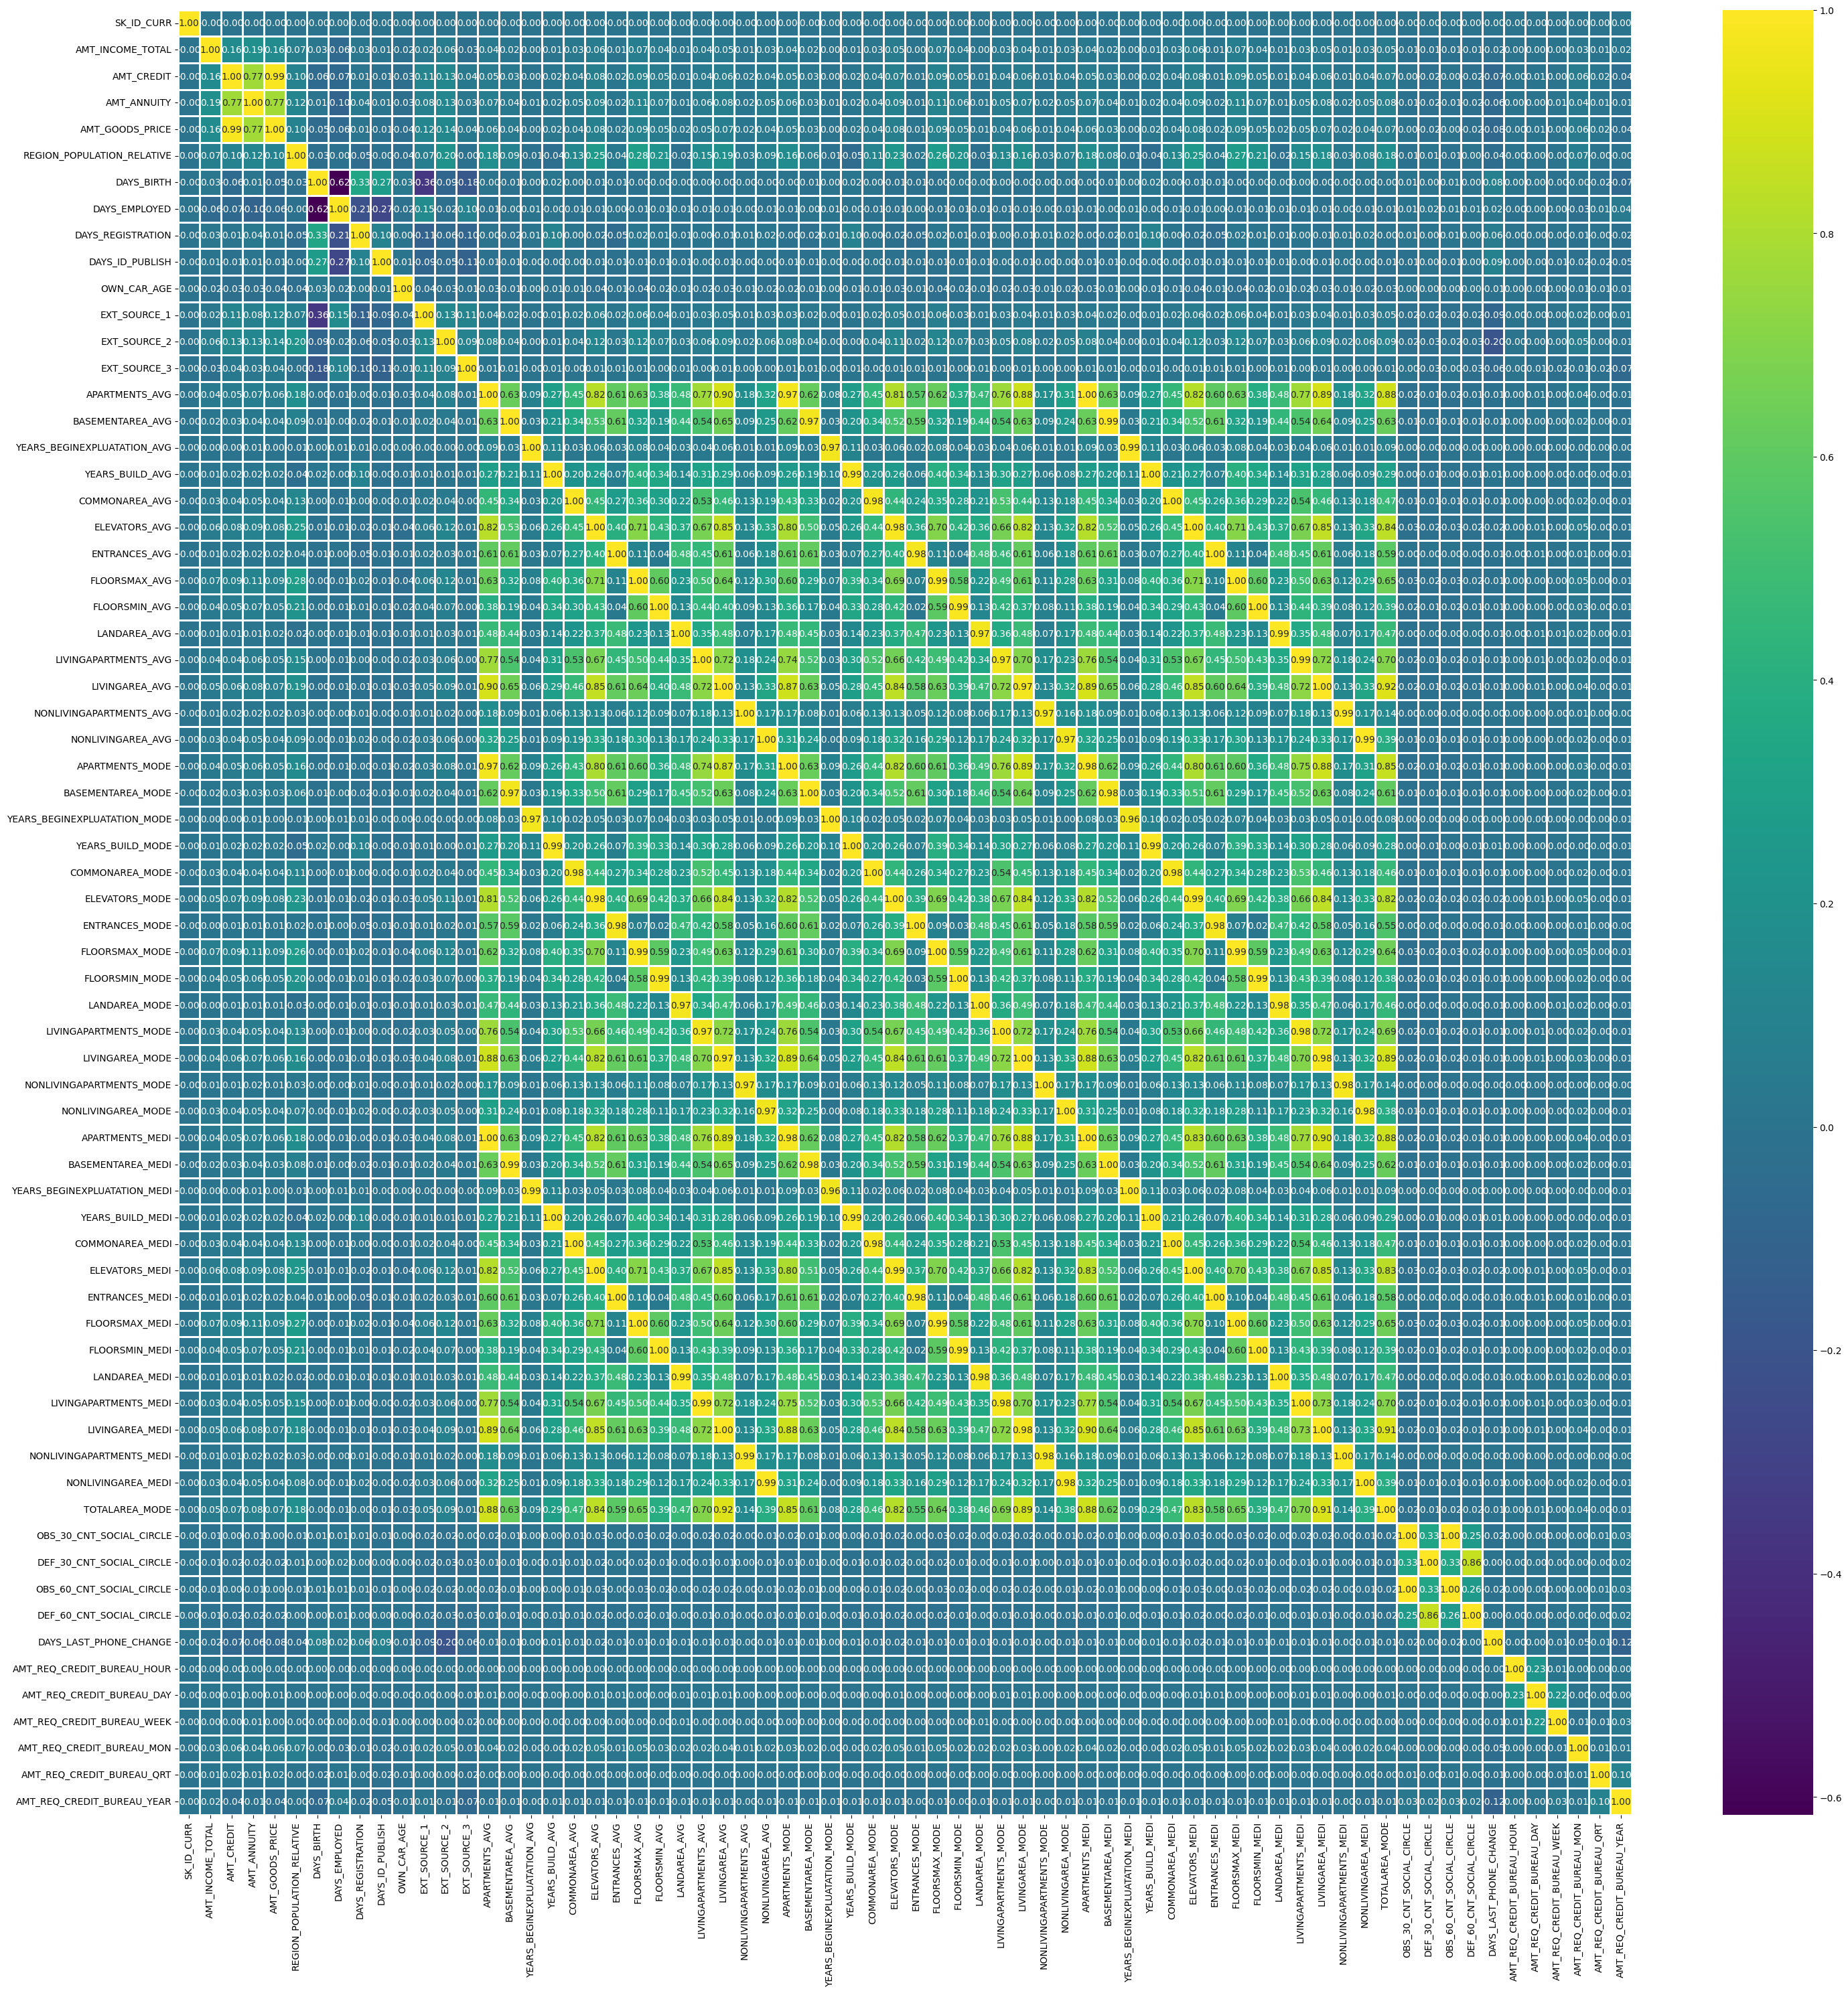

In [2]:
df = pd.read_csv("../data/processed/application_train.csv")
intermediate_train = pd.read_csv("../data/interim/train_before_normalisation.csv")
intermediate_test = pd.read_csv("../data/interim/test_before_normalisation.csv")
raw = pd.read_csv("../data/raw/application_train.csv")

fig, ax= plt.subplots(figsize = (35,35))
sns.heatmap(intermediate_train[["SK_ID_CURR","AMT_INCOME_TOTAL","AMT_CREDIT",
"AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH",
"DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE",
"EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","APARTMENTS_AVG","BASEMENTAREA_AVG",
"YEARS_BEGINEXPLUATATION_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG"
,"ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG",
"LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG","APARTMENTS_MODE",
"BASEMENTAREA_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE","FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE",
"LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE",
"APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI",
"COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI",
"LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI","TOTALAREA_MODE",
"OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].corr(),cmap="viridis", annot = True, fmt = ".2f", linewidths=1, ax=ax)

<AxesSubplot: xlabel='TARGET', ylabel='count'>

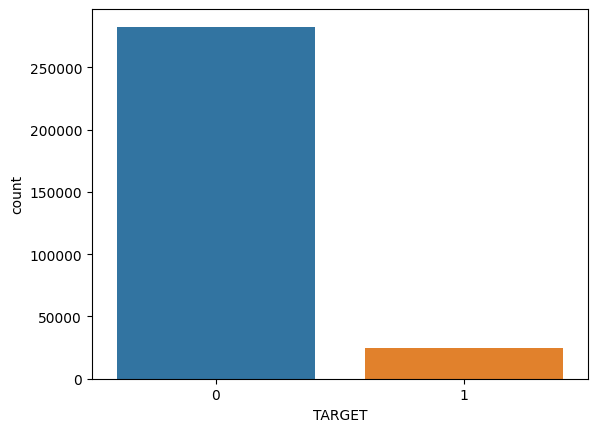

In [3]:
sns.countplot(x='TARGET',data=intermediate_train)

#### Visualise the weights associated to each feature of the XGB boost model

In [4]:
cat_features = pickle.load(open("../data/features/cat_features.pkl",'rb'))
num_features = pickle.load(open("../data/features/num_features.pkl",'rb'))
train = pd.read_csv("../data/raw/application_train.csv").set_index('SK_ID_CURR')
X_test = pd.read_csv("../data/raw/application_test.csv").set_index('SK_ID_CURR')
y = train.TARGET

X_train, X_test = train.iloc[:, 1:240], train.iloc[:, 1:240]
y_train, y_test = train.TARGET, train.TARGET

test = pd.read_csv("../data/raw/application_test.csv").set_index("SK_ID_CURR")
X = train.drop('TARGET',axis=1)#pd.concat([train, test], ignore_index=True).drop("TARGET", axis=1)

new_path = '../src/features'
if new_path not in sys.path:
    sys.path.append(new_path)

In [6]:
pipeline = pickle.load(open('../models/pipe.pkl', 'rb'))
preprocessor = pipeline.named_steps["preprocessing"]

In [7]:
print("Weights of features")
eli5.show_weights(pipeline.named_steps['clf'])

Weights of features


In [8]:
doc = pd.read_csv("../data/processed/application_test.csv")
record = doc.iloc[0]
eli5.explain_prediction_xgboost(pipeline.named_steps['clf'], doc=record)

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,\n              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n              early_stopping_rounds=None, enable_categorical=False,\n              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,\n              grow_policy='depthwise', importance_type=None,\n              interaction_constraints='', learning_rate=0.300000012,\n              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,\n              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,\n              missing=nan, monotone_constraints='()', n_estimators=100,\n              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.56813447791181, std=None, value=1.0), FeatureWeight(feature='152', weight=0.09723858168222493, std=None, value=1.506879672248598), FeatureWeight(feature='223', weight=0.0343065454000105, std=None, value=-0.206991610605546), FeatureWeight(feature='149', weight=0.013403723904466472, std=None, value=-0.166143321150213), FeatureWeight(feature='106', weight=0.007645366505165584, std=None, value=0.0), FeatureWeight(feature='159', weight=0.007344946200443861, std=None, value=-0.4990130509434402), FeatureWeight(feature='170', weight=0.006659319394641014, std=None, value=-0.2912078747259788), FeatureWeight(feature='165', weight=0.005732718655292848, std=None, value=-0.0626985338920518), FeatureWeight(feature='118', weight=0.000916855057217072, std=None, value=0.0)], neg=[FeatureWeight(feature='175', weight=-0.9438487059208303, std=None, value=-2.153650937474764), FeatureWeight(feature='173', weight=-0.5228371680940738, std=None, value=-3.021877286152298), FeatureWeight(feature='174', weight=-0.31072584870248565, std=None, value=-1.317940277769374), FeatureWeight(feature='3', weight=-0.15007983454593427, std=None, value=1.0), FeatureWeight(feature='150', weight=-0.12488594949878033, std=None, value=-0.5072358178593501), FeatureWeight(feature='220', weight=-0.11139470007688794, std=None, value=4.163504469696982), FeatureWeight(feature='153', weight=-0.05804409139453105, std=None, value=-0.4562151902540676), FeatureWeight(feature='20', weight=-0.05033231316777005, std=None, value=1.0), FeatureWeight(feature='22', weight=-0.04542867074314429, std=None, value=0.0), FeatureWeight(feature='225', weight=-0.042998785154454655, std=None, value=0.6390651950561114), FeatureWeight(feature='148', weight=-0.036337179428818436, std=None, value=-0.4780949616371542), FeatureWeight(feature='139', weight=-0.03343993665110649, std=None, value=1.0), FeatureWeight(feature='156', weight=-0.023014431892348343, std=None, value=-0.1463134859077592), FeatureWeight(fea

In [16]:
def get_processed(num_features):
    ohe_features = preprocessor.transformers[0][1]\
        ['onehot'].get_feature_names(cat_features)
    #new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_features) for val in vals]
    num_features = pd.DataFrame(num_features)
    #new_ohe_features = pd.DataFrame(new_ohe_features)
    ohe_features = pd.DataFrame(ohe_features)
    all_features = pd.concat([num_features,ohe_features])
    print(all_features)
    print("Nb numerical features",len(num_features))
    #print("Nb categorical features",len(new_ohe_features), " but before : ", len(ohe_features))
    print('get processed data')
    processed = pd.read_csv("../data/processed/application_test.csv")
    #processed = processed.drop(columns=["Unnamed: 0"])
    print(len(processed.columns))
    return processed, all_features, ohe_features

In [17]:
processed, all_features, ohe_features = get_processed(num_features)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


                           0
0               CNT_CHILDREN
1           AMT_INCOME_TOTAL
2                 AMT_CREDIT
3                AMT_ANNUITY
4            AMT_GOODS_PRICE
..                       ...
141        FLAG_OWN_REALTY_N
142        FLAG_OWN_REALTY_Y
143   EMERGENCYSTATE_MODE_No
144  EMERGENCYSTATE_MODE_Yes
145  EMERGENCYSTATE_MODE_nan

[250 rows x 1 columns]
Nb numerical features 104
get processed data
251


In [83]:
X_test.iloc[[4]]

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
100007             Cash loans           M            N               Y   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100007                 0          121500.0    513000.0      21865.5   

            AMT_GOODS_PRICE NAME_TYPE_SUITE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                   ...                    
100007             513000.0   Unaccompanied  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
100007                    0                0                0   

            AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                          
100007                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                                                          
100007                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                                                         
100007                            0.0                         0.0  

[1 rows x 120 columns]

In [84]:
y_test.iloc[4]

0

In [30]:
processed.iloc[4]

0      1.000000
1      0.000000
2      0.000000
3      1.000000
4      0.000000
         ...   
245   -0.058766
246   -0.155837
247   -0.269947
248   -0.308620
249   -1.007331
Name: 4, Length: 250, dtype: float64

In [18]:
eli5.show_prediction(pipeline.named_steps["clf"], 
                    processed.iloc[4]
                    )

In [19]:
def convert_to_lime_format(X, categorical_names, col_names=None, invert=False):
    if not isinstance(X, pd.DataFrame):
        X_lime = pd.DataFrame(X, columns=col_names)
    else:
        X_lime = X.copy()
    for k, v in categorical_names.items():
        if not invert:
            label_map = {str_label: int_label for int_label, str_label in enumerate(v)}
        else:
            label_map = {int_label: str_label for int_label, str_label in enumerate(v)}
        X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)
    return X_lime

In [21]:
cat_feats = pd.DataFrame(pipeline.named_steps['preprocessing'].transformers[0][2])
print(len(cat_feats))
preprocessor.transformers[0][1]\
    ['onehot'].get_feature_names(cat_features)
categorical_names = cat_features#{}
"""for col in cat_features:
    categorical_names[X_train.columns.get_loc(col)] = [new_col for new_col in ohe_features]"""
print(categorical_names)
X_lime = convert_to_lime_format(processed, cat_feats)

16
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']


Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [26]:
X_lime = X_lime.drop(columns=['Unnamed: 0'])#interpolate(method='pad', limit=2)
X_lime
#X_lime.columns[X_lime.isna().any()].tolist()

0    1    2    3    4    5    6    7    8    9  ...       240  \
0       1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
1       1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ... -0.090534   
2       0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
3       1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
4       1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
307506  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
307507  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
307508  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
307509  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   
307510  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.090534   

             241       242       243        244       245       246       247  \
0      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
1      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
2      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
3      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
4      -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
...          ...       ...       ...        ...       ...       ...       ...   
307506 -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
307507 -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
307508 -0.024402 -0.022529 -0.018305  12.747224 -0.058766 -0.155837  0.897175   
307509 -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837 -0.269947   
307510 -0.024402 -0.022529 -0.018305  -0.070987 -0.058766 -0.155837  2.064297   

            248       249  
0      -0.30862 -0.440926  
1      -0.30862 -1.007331  
2      -0.30862 -1.007331  
3      -0.30862 -0.440926  
4      -0.30862 -1.007331  
...         ...       ...  
307506 -0.30862 -0.440926  
307507 -0.30862 -0.440926  
307508 -0.30862 -0.440926  
307509 -0.30862 -1.007331  
307510 -0.30862 -0.440926  

[307511 rows x 250 columns]

In [27]:
explainer = LimeTabularExplainer(X_lime.values,
                                feature_names=processed.columns.tolist(),
                                categorical_names=categorical_names,
                                categorical_features=cat_feats.keys(),
                                discretize_continuous=True,
                                random_state=42
                                 )

In [28]:
i = 2
X_observation = X_test.iloc[[i], :]
X_observation

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
100004        Revolving loans           M            Y               Y   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100004                 0           67500.0    135000.0       6750.0   

            AMT_GOODS_PRICE NAME_TYPE_SUITE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                   ...                    
100004             135000.0   Unaccompanied  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
100004                    0                0                0   

            AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                          
100004                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                                                          
100004                             0.0                        0.0   

            AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                                                         
100004                            0.0                         0.0  

[1 rows x 120 columns]

In [29]:
observation = convert_to_lime_format(X_observation,ohe_features).values[0]
print(observation)

[nan 'M' 'Y' 'Y' 0 67500.0 135000.0 6750.0 135000.0 'Unaccompanied'
 'Working' 'Secondary / secondary special' 'Single / not married'
 'House / apartment' 0.010032 -19046 -225 -4260.0 -2531 26.0 1 1 1 1 1 0
 'Laborers' 1.0 2 2 'MONDAY' 9 0 0 0 0 0 0 'Government' nan
 0.5559120833904428 0.7295666907060153 nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan 0.0 0.0 0.0 0.0 -815.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0.0 0.0 0.0 0.0 0.0 0.0]


In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [30]:
def predict_proba(X, model):
    X_str = convert_to_lime_format(X, categorical_names, col_names=X_train.columns, invert=True)
    return model.predict_proba(X_str)

In [32]:
xgb_predict_proba = partial(predict_proba, model=pipeline.named_steps['clf'])
explanation = explainer.explain_instance(processed[4], 
    xgb_predict_proba, 
    num_features=5)
explanation.show_in_notebook(show_table=True, show_all=False)

InvalidIndexError: (slice(None, None, None), 1)

In [ ]:
explanation.save_to_file("explanation.html")

In [ ]:
print(explanation.local_exp)
print(explanation.intercept)
print(explanation.score)

{1: [(14, -0.3370625397423847), (17, 0.19458530462149298), (18, -0.18053443382803078), (15, 0.09880432604995228), (7, -0.06929534733372465)]}
{1: 0.6711143104846994}
0.41279908661112674


If your R-squared is low, the linear model that LIME fitted isn't a great approximation to your model, which means you should not rely too much on the explanation it provides.

## More local interpretation with SHAP

In [44]:
import shap
shap.initjs() 
explainer = shap.TreeExplainer(pipeline.named_steps["clf"])
observations = pipeline.named_steps["preprocessing"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

c:\Users\julie.ngan\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580

In [45]:
i=0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations[i], feature_names=all_features)

NameError: name 'shap_values' is not defined

In [ ]:
shap.force_plot(explainer.expected_value, shap_values,
                features=observations, feature_names=all_features)

We can see our 1000 samples on the x axis. The y-axis corresponds to the same scale we were looking at before, where blue values corresponds to the probability decreasing, red increasing. Hover with your mouse on a point to see the main features impacting a given observation. You can also use the drop down on the left to visualise the impact of specific features, for example duration only.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


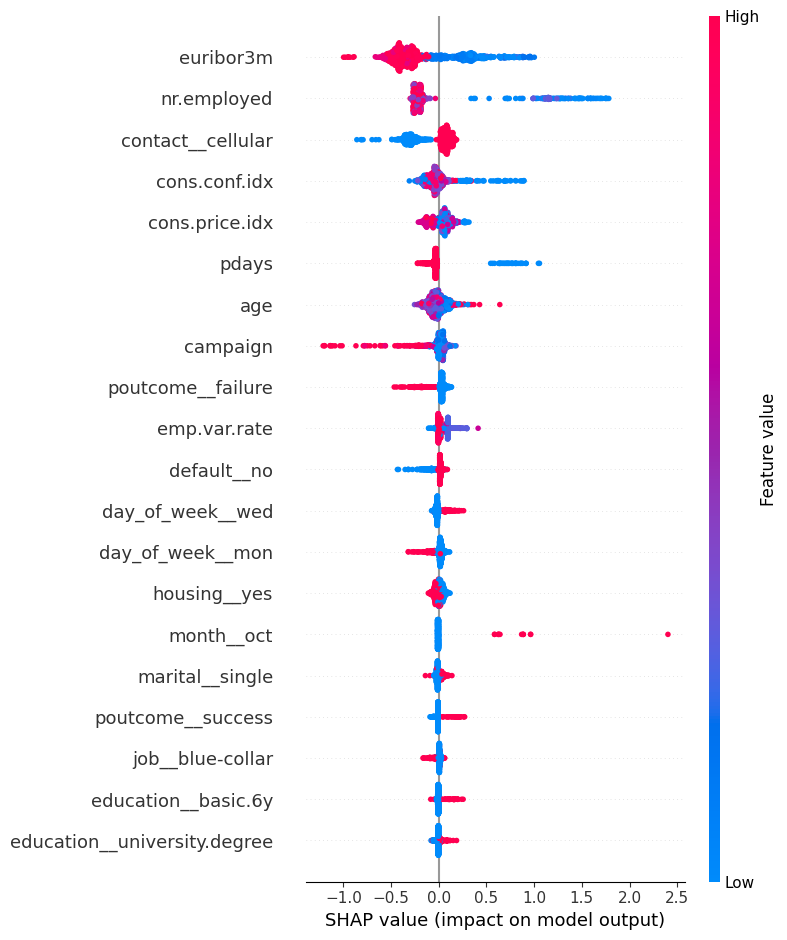

In [ ]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

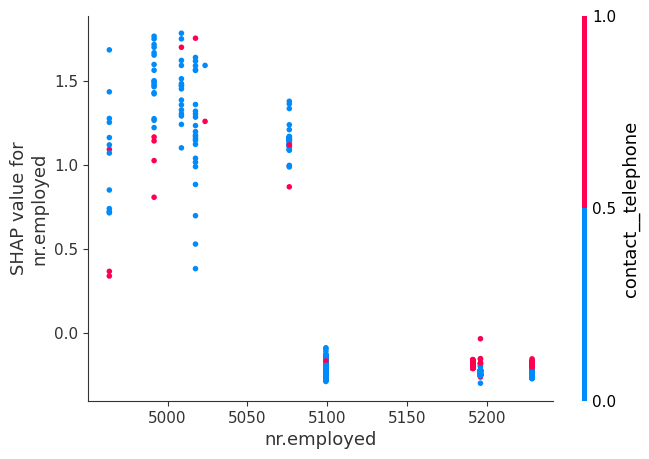

In [ ]:
shap.dependence_plot("nr.employed", shap_values, 
                     pd.DataFrame(observations, columns=all_features))